# Bicycle Rental Count prediction## Multiple Linear Regression

#### Import necessary packages for this demonstration and load the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from scipy import stats

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.shape

(730, 16)

### There are 730 rows and 16 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Though there are several integer type data , there are a few that are categorical in nature. We will deal with these as we proceed

In [5]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Data Quality checks

## We can see from the df.info() that there are no NULL values as all 730 values are found across all the 16 columns as per df.shape.

## Let's check for duplicates

In [6]:
df_dupe_check = df.copy()

In [7]:
df_dupe_check.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### drop_duplicates() returns a data set with the duplicates dropped. But here we notice it has returned all 730 rows indicating that there are no duplicates

## Let's check for junk values in the columns

In [8]:
for i in df.columns:
    print(df[i].value_counts())

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64
dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
yr
0    365
1    365
Name: count, dtype: int64
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
holiday
0    709
1     21
Name: count, dtype: int64
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
workingday
1    499
0    231
Name: count, dtype: int64
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1

### The values seem to be fine and not anything out of expectations

## Let's analyse the columns and drop the unwanted columns 

In [9]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### 1) Right off the bat we can notice that the column *instant* seems to be an indexing column , so we can drop this.
### 2) The essence of column dteday has been captured by yr and mnth. So we can remove this as well.
### 3) We can see that target column cnt is just a sum of casual and registerd , we can remove this as well.
 

In [10]:
df = df.drop(columns=['dteday','casual','registered','instant'],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### We are now left with 12 columns for analysing

#### Since our goal is to build a linear regression model , having a numerical value in weathersit,season and yr does not make sense so we will map the numbers with respect to the values in data dictionary

In [12]:
df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [13]:
def weathersit_map(x):
    if x== 1:
        return 'Clear'
    elif x== 2:
        return 'Misty'
    elif x== 3:
        return 'Light Snow/Rain'
    elif x== 4:
        return 'Heavy Rain/Snow'
    else: return 'wrong selection'

In [14]:
def season_map(x):
    if x== 1:
        return 'spring'
    elif x== 2:
        return 'summer'
    elif x== 3:
        return 'fall'
    elif x== 4:
        return 'winter'
    else: return 'wrong selection'

In [15]:
df['weathersit']=df['weathersit'].apply(weathersit_map)
df['yr']=df['yr'].apply(lambda x: '2018' if x==0 else '2019')
df['season']=df['season'].apply(season_map)                        

In [16]:
df['weathersit'].value_counts()

weathersit
Clear              463
Misty              246
Light Snow/Rain     21
Name: count, dtype: int64

#### We have now successfully converted this into a categorical column , we can use get_dummies on this eventually while prepping it for the model

# Let's Perform EDA on the data set to understand the data

#### Univariate analysis

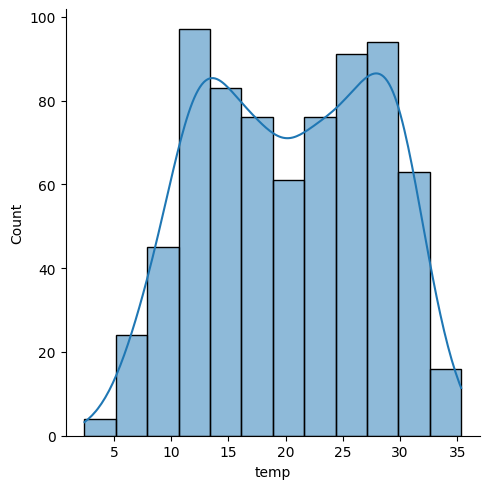

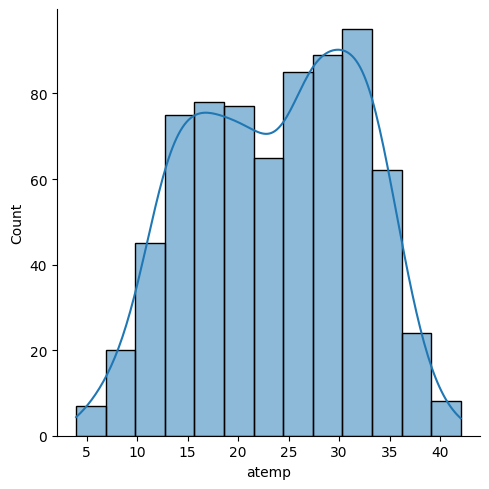

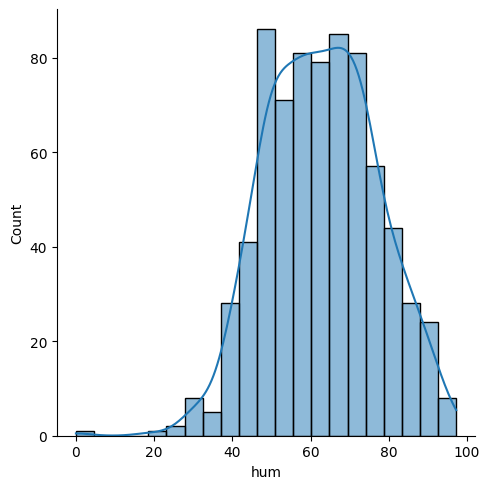

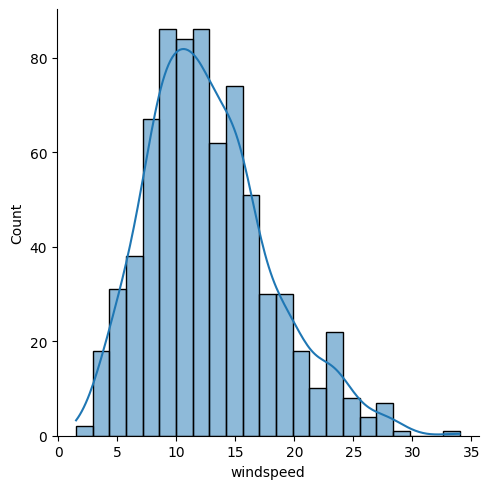

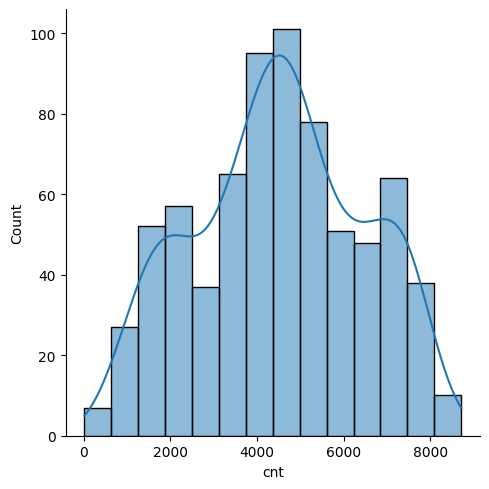

In [17]:
for i in ['temp','atemp','hum','windspeed','cnt']:
    sns.displot(df[i],kde=True)

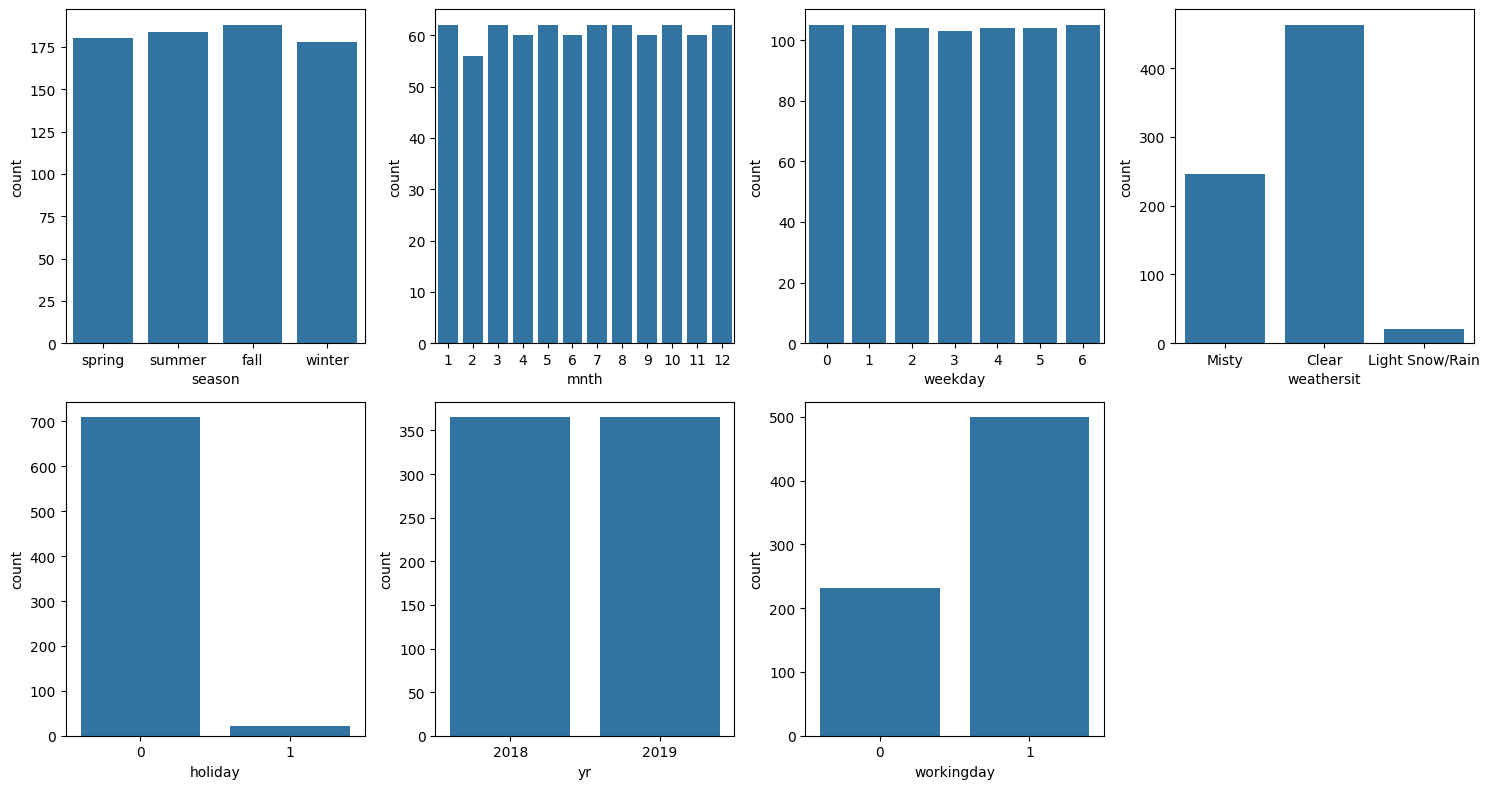

In [18]:
count=1
plt.figure(figsize=[15,8])
for i in ['season','mnth','weekday','weathersit','holiday','yr','workingday']:
    plt.subplot(2,4,count)
    sns.countplot(data = df, x =i)
    count=count+1
    plt.tight_layout()

#### Insights 
* we can see that 2nd month there is a dip , but this maybe due to the fact that it has only 28 days.
* weathersit maybe a strong feature as the rentals dip during light snow/rain weather.
* Holiday or not also seems to be a good variable.
* Similar is the case with workingday.
* We can see that the numerical variables are kind of normally distributed

#### Bi-variate Analysis

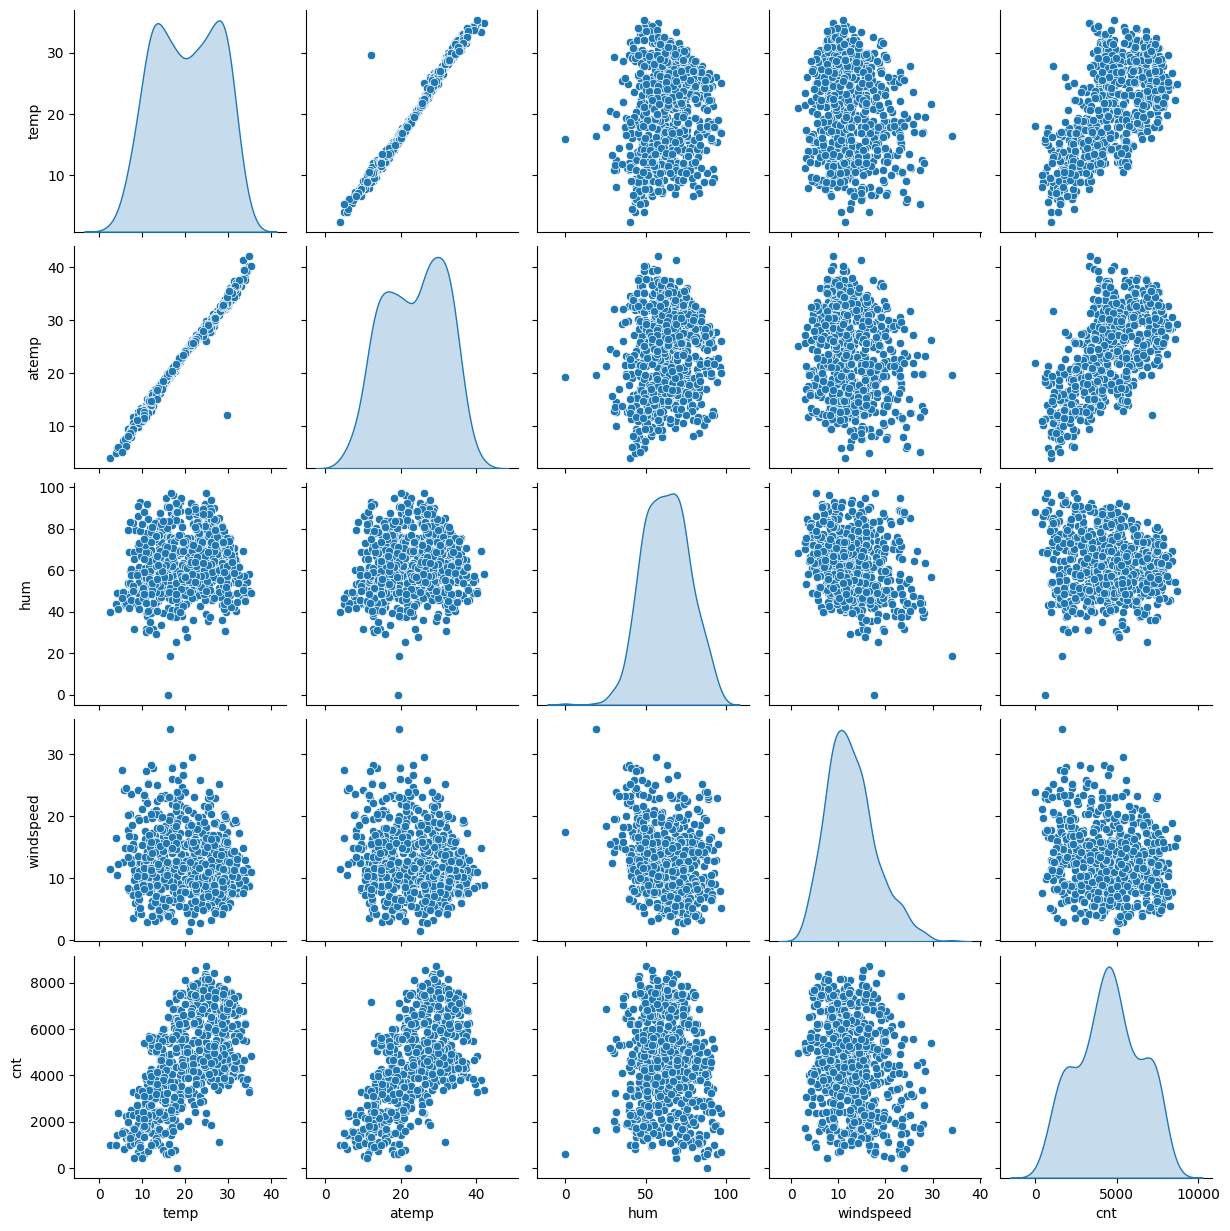

In [19]:
bike_num=df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde',)
plt.show()

#### Insights 
* we can see a slight linear trend with temp and atemp variable

##### Categorical vs Target

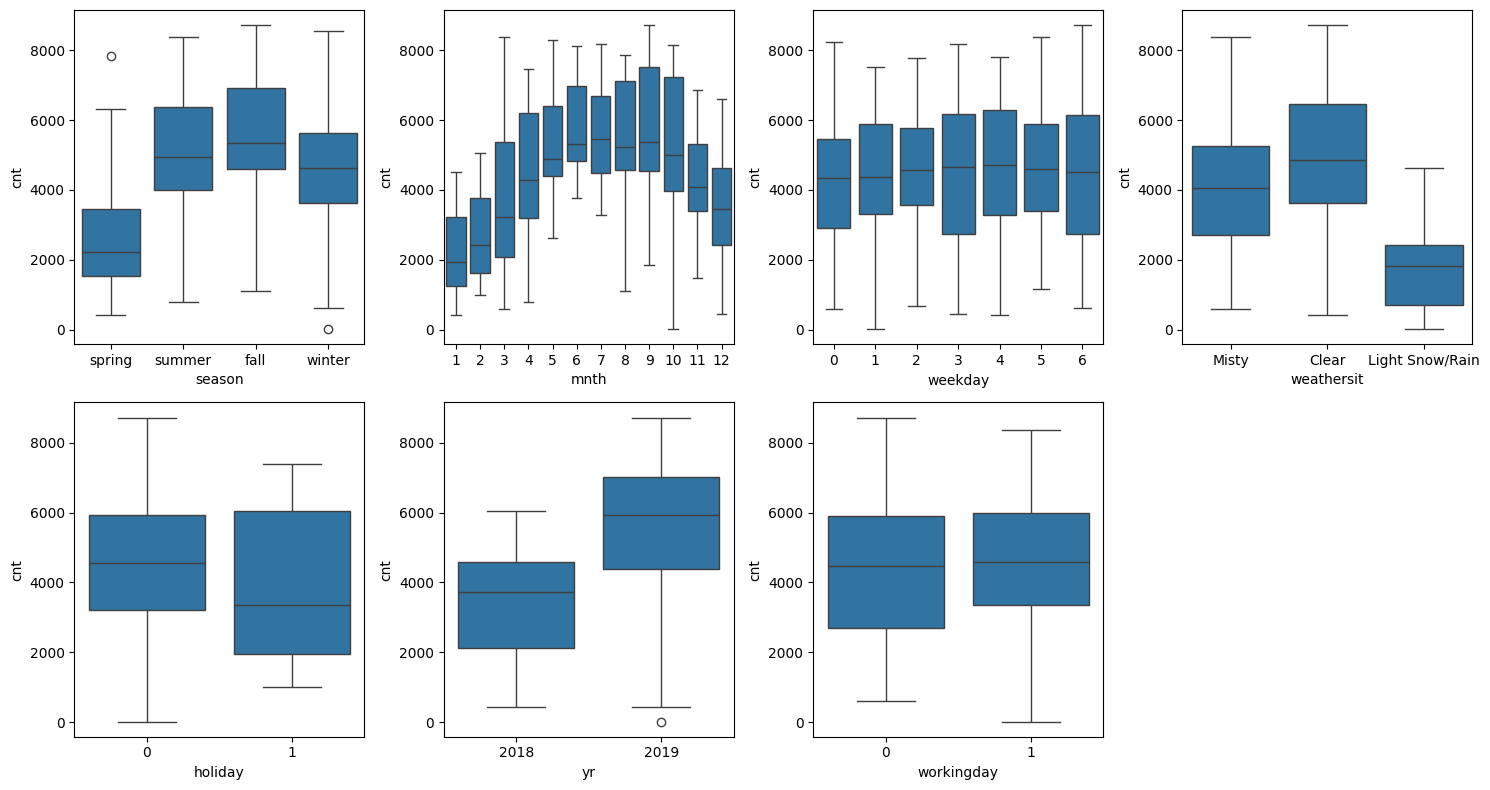

In [20]:
count=1
plt.figure(figsize=[15,8])
for i in ['season','mnth','weekday','weathersit','holiday','yr','workingday']:
    plt.subplot(2,4,count)
    sns.boxplot(x = i, y = 'cnt', data = df)
    count=count+1
    plt.tight_layout()

#### Insights 
From this plot we can see a few trends:
* Season 1 (Spring Season) has the least count compared to the others ((1:spring, 2:summer, 3:fall, 4:winter)
* we can see a trend with the months as well , this maybe due to the fact that seasons and weather are linked to the month.
* clearly the count is much lesser in Snow/Rain environment conditions
* Our data set says that the rental is more in 2019 (This maybe due to the popularity it gained over the previous year)

#### Multivariate Analysis

<Axes: >

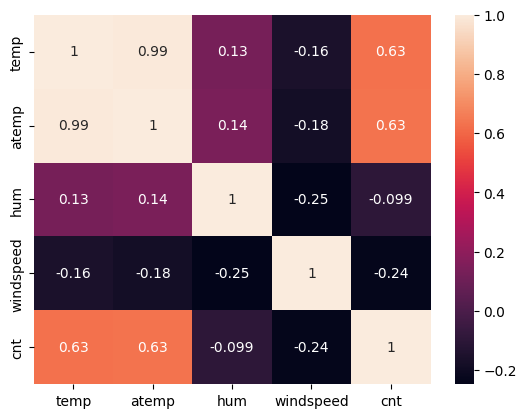

In [21]:
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(),annot=True)

#### Insights 
* Atemp and temp have a strong effect on each other posing a multicolinearity threat. (Multicolinearity is when one predictor variable affects another predictor variable).
* We also see that 

# Data Preperation , Train Test Split and Scaling

## We also know that columns  'mnth', 'weekday'& 'season' are categorical in nature , so let's go ahead and create the dummy columns

In [22]:
df['season']=df['season'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')

In [23]:
df = pd.get_dummies(data=df,drop_first=True,dtype=int)

In [24]:
df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow/Rain,weathersit_Misty
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     730 non-null    int64  
 1   workingday                  730 non-null    int64  
 2   temp                        730 non-null    float64
 3   atemp                       730 non-null    float64
 4   hum                         730 non-null    float64
 5   windspeed                   730 non-null    float64
 6   cnt                         730 non-null    int64  
 7   season_spring               730 non-null    int32  
 8   season_summer               730 non-null    int32  
 9   season_winter               730 non-null    int32  
 10  yr_2019                     730 non-null    int32  
 11  mnth_2                      730 non-null    int32  
 12  mnth_3                      730 non-null    int32  
 13  mnth_4                      730 non

#### Train - Test - Split

In [26]:
X = df.drop(columns='cnt')
y = df['cnt']

In [27]:
y = np.reshape(np.array(y),(-1,1))

In [28]:
X_train , X_test , y_train , y_test = tts(X,y,random_state=333,train_size = 0.70, test_size = 0.30)

#### Scaling 


In [29]:
ss = StandardScaler()

In [30]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

X_train[num_vars] = ss.fit_transform(X_train[num_vars])
X_test[num_vars] = ss.transform(X_test[num_vars])
y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     510 non-null    int64  
 1   workingday                  510 non-null    int64  
 2   temp                        510 non-null    float64
 3   atemp                       510 non-null    float64
 4   hum                         510 non-null    float64
 5   windspeed                   510 non-null    float64
 6   season_spring               510 non-null    int32  
 7   season_summer               510 non-null    int32  
 8   season_winter               510 non-null    int32  
 9   yr_2019                     510 non-null    int32  
 10  mnth_2                      510 non-null    int32  
 11  mnth_3                      510 non-null    int32  
 12  mnth_4                      510 non-null    int32  
 13  mnth_5                      510 non-nu

# Model Building Using statsmodels

### We will use Manual Backward selction to choose the neessary predictors.
#### We will get rid of the values with high p-value and high VIF then remove the one's with high p-value

In [32]:
X_train_sm = sm.add_constant(X_train)


In [33]:
lr1 = sm.OLS(y_train,X_train_sm).fit()

In [34]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.71
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          4.67e-176
Time:                        14:10:28   Log-Likelihood:                -245.84
No. Observations:                 510   AIC:                             549.7
Df Residuals:                     481   BIC:                             672.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7123      0.167     -4.261      0.000      -1.041      -0.384
holiday                        0.0099      0.111      0.089      0.929      -0.208       0.227
workingday                     0.1424      0.043      3.331      0.001       0.058       0.226
temp                           0.3581      0.145      2.477      0.014       0.074       0.642
atemp                          0.0982      0.133      0.738      0.461      -0.163       0.360
hum                           -0.1145      0.026     -4.422      0.000      -0.165      -0.064
windspeed                     -0.1289      0.020     -6.333      0.000      -0.169      -0.089
season_spring                 -0.4043      0.137     -2.943      0.003      -0.674      -0.134
season_summer                  0.0513      0.120      0.427      0.670      -0.185       0.287
season_winter                  0.3947      0.120      3.278      0.001       0.158       0.631
yr_2019                        1.0265      0.037     28.013      0.000       0.955       1.099
mnth_2                         0.0700      0.089      0.785      0.433      -0.105       0.245
mnth_3                         0.3000      0.104      2.896      0.004       0.096       0.504
mnth_4                         0.1660      0.158      1.050      0.294      -0.145       0.477
mnth_5                         0.2898      0.172      1.687      0.092      -0.048       0.627
mnth_6                         0.1894      0.180      1.055      0.292      -0.163       0.542
mnth_7                         0.0031      0.199      0.016      0.987      -0.388       0.394
mnth_8                         0.1299      0.191      0.681      0.496      -0.245       0.505
mnth_9                         0.4787      0.168      2.845      0.005       0.148       0.809
mnth_10                        0.2034      0.155      1.311      0.191      -0.101       0.508
mnth_11                       -0.0976      0.147     -0.665      0.507      -0.386       0.191
mnth_12                       -0.0578      0.117     -0.495      0.621      -0.287       0.172
weekday_1                     -0.0743      0.046     -1.619      0.106      -0.164       0.016
weekday_2                      0.0142      0.050      0.283      0.777      -0.084       0.113
weekday_3                      0.0755      0.048      1.561      0.119      -0.020       0.171
weekday_4                      0.0573      0.051      1.128      0.260      -0.042       0.157
weekday_5                      0.0795      0.049      1.613      0.107      -0.017       0.176
weekday_6                      0.2401      0.066      3.621      0.000       0.110       0.370
weathersit_Light Snow/Rain    -1.2055      0.128     -9.388      0.000      -1.458      -0.953
weathersit_Misty              -0.2215      

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
26,weekday_5,inf
25,weekday_4,inf
24,weekday_3,inf
23,weekday_2,inf
22,weekday_1,inf
1,holiday,inf
0,const,87.55
3,temp,65.47
4,atemp,55.47


In [36]:
X_train_sm = X_train_sm.drop(columns='atemp')
lr2 = sm.OLS(y_train,X_train_sm).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          6.10e-177
Time:                        14:10:28   Log-Likelihood:                -246.12
No. Observations:                 510   AIC:                             548.2
Df Residuals:                     482   BIC:                             666.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7114      0.167     -4.258      0.000      -1.040      -0.383
holiday                        0.0053      0.110      0.048      0.962      -0.212       0.222
workingday                     0.1427      0.043      3.341      0.001       0.059       0.227
temp                           0.4591      0.047      9.811      0.000       0.367       0.551
hum                           -0.1141      0.026     -4.408      0.000      -0.165      -0.063
windspeed                     -0.1320      0.020     -6.635      0.000      -0.171      -0.093
season_spring                 -0.4021      0.137     -2.929      0.004      -0.672      -0.132
season_summer                  0.0543      0.120      0.453      0.651      -0.181       0.290
season_winter                  0.3999      0.120      3.329      0.001       0.164       0.636
yr_2019                        1.0262      0.037     28.020      0.000       0.954       1.098
mnth_2                         0.0725      0.089      0.814      0.416      -0.102       0.247
mnth_3                         0.3013      0.104      2.910      0.004       0.098       0.505
mnth_4                         0.1690      0.158      1.070      0.285      -0.141       0.479
mnth_5                         0.2866      0.172      1.669      0.096      -0.051       0.624
mnth_6                         0.1829      0.179      1.020      0.308      -0.169       0.535
mnth_7                        -0.0033      0.199     -0.017      0.987      -0.394       0.387
mnth_8                         0.1178      0.190      0.620      0.536      -0.256       0.491
mnth_9                         0.4725      0.168      2.813      0.005       0.142       0.803
mnth_10                        0.2021      0.155      1.304      0.193      -0.103       0.507
mnth_11                       -0.0977      0.147     -0.665      0.506      -0.386       0.191
mnth_12                       -0.0567      0.117     -0.486      0.627      -0.286       0.173
weekday_1                     -0.0732      0.046     -1.597      0.111      -0.163       0.017
weekday_2                      0.0139      0.050      0.277      0.782      -0.084       0.112
weekday_3                      0.0744      0.048      1.541      0.124      -0.021       0.169
weekday_4                      0.0570      0.051      1.124      0.262      -0.043       0.157
weekday_5                      0.0758      0.049      1.546      0.123      -0.021       0.172
weekday_6                      0.2402      0.066      3.624      0.000       0.110       0.370
weathersit_Light Snow/Rain    -1.2089      0.128     -9.425      0.000      -1.461      -0.957
weathersit_Misty              -0.2221      0.048     -4.631      0.000      -0.316      -0.128
===========================================

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
25,weekday_5,inf
24,weekday_4,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
1,holiday,inf
0,const,87.54
6,season_spring,11.06
16,mnth_8,10.01


In [38]:
X_train_sm = X_train_sm.drop(columns='mnth_7')
lr3 = sm.OLS(y_train,X_train_sm).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.97e-178
Time:                        14:10:28   Log-Likelihood:                -246.13
No. Observations:                 510   AIC:                             546.3
Df Residuals:                     483   BIC:                             660.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7138      0.085     -8.368      0.000      -0.881      -0.546
holiday                        0.0054      0.110      0.049      0.961      -0.211       0.222
workingday                     0.1428      0.043      3.352      0.001       0.059       0.226
temp                           0.4586      0.038     11.942      0.000       0.383       0.534
hum                           -0.1140      0.026     -4.441      0.000      -0.164      -0.064
windspeed                     -0.1320      0.020     -6.670      0.000      -0.171      -0.093
season_spring                 -0.4007      0.108     -3.697      0.000      -0.614      -0.188
season_summer                  0.0549      0.114      0.481      0.631      -0.169       0.279
season_winter                  0.4007      0.111      3.600      0.000       0.182       0.619
yr_2019                        1.0263      0.036     28.158      0.000       0.955       1.098
mnth_2                         0.0730      0.084      0.864      0.388      -0.093       0.239
mnth_3                         0.3022      0.088      3.439      0.001       0.130       0.475
mnth_4                         0.1706      0.124      1.380      0.168      -0.072       0.414
mnth_5                         0.2886      0.125      2.305      0.022       0.043       0.535
mnth_6                         0.1854      0.106      1.751      0.080      -0.023       0.393
mnth_8                         0.1207      0.083      1.462      0.144      -0.041       0.283
mnth_9                         0.4749      0.087      5.432      0.000       0.303       0.647
mnth_10                        0.2036      0.124      1.639      0.102      -0.040       0.448
mnth_11                       -0.0965      0.126     -0.765      0.445      -0.344       0.151
mnth_12                       -0.0558      0.103     -0.543      0.588      -0.258       0.146
weekday_1                     -0.0732      0.046     -1.599      0.110      -0.163       0.017
weekday_2                      0.0139      0.050      0.278      0.781      -0.084       0.112
weekday_3                      0.0745      0.048      1.548      0.122      -0.020       0.169
weekday_4                      0.0571      0.051      1.130      0.259      -0.042       0.156
weekday_5                      0.0758      0.049      1.549      0.122      -0.020       0.172
weekday_6                      0.2402      0.066      3.629      0.000       0.110       0.370
weathersit_Light Snow/Rain    -1.2091      0.128     -9.460      0.000      -1.460      -0.958
weathersit_Misty              -0.2222      0.048     -4.647      0.000      -0.316      -0.128
==============================================================================
Omnibus:                       88.570   Durbin-Watson:     

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,inf
24,weekday_5,inf
23,weekday_4,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
1,holiday,inf
0,const,22.86
7,season_summer,7.61
8,season_winter,7.12


In [40]:
X_train_sm = X_train_sm.drop(columns='holiday')
lr4 = sm.OLS(y_train,X_train_sm).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     102.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          5.97e-178
Time:                        14:10:28   Log-Likelihood:                -246.13
No. Observations:                 510   AIC:                             546.3
Df Residuals:                     483   BIC:                             660.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7138      0.085     -8.368      0.000      -0.881      -0.546
workingday                     0.1374      0.124      1.104      0.270      -0.107       0.382
temp                           0.4586      0.038     11.942      0.000       0.383       0.534
hum                           -0.1140      0.026     -4.441      0.000      -0.164      -0.064
windspeed                     -0.1320      0.020     -6.670      0.000      -0.171      -0.093
season_spring                 -0.4007      0.108     -3.697      0.000      -0.614      -0.188
season_summer                  0.0549      0.114      0.481      0.631      -0.169       0.279
season_winter                  0.4007      0.111      3.600      0.000       0.182       0.619
yr_2019                        1.0263      0.036     28.158      0.000       0.955       1.098
mnth_2                         0.0730      0.084      0.864      0.388      -0.093       0.239
mnth_3                         0.3022      0.088      3.439      0.001       0.130       0.475
mnth_4                         0.1706      0.124      1.380      0.168      -0.072       0.414
mnth_5                         0.2886      0.125      2.305      0.022       0.043       0.535
mnth_6                         0.1854      0.106      1.751      0.080      -0.023       0.393
mnth_8                         0.1207      0.083      1.462      0.144      -0.041       0.283
mnth_9                         0.4749      0.087      5.432      0.000       0.303       0.647
mnth_10                        0.2036      0.124      1.639      0.102      -0.040       0.448
mnth_11                       -0.0965      0.126     -0.765      0.445      -0.344       0.151
mnth_12                       -0.0558      0.103     -0.543      0.588      -0.258       0.146
weekday_1                     -0.0678      0.128     -0.530      0.597      -0.319       0.184
weekday_2                      0.0193      0.142      0.136      0.892      -0.259       0.298
weekday_3                      0.0799      0.139      0.573      0.567      -0.194       0.354
weekday_4                      0.0625      0.140      0.445      0.656      -0.213       0.338
weekday_5                      0.0812      0.140      0.579      0.563      -0.194       0.357
weekday_6                      0.2402      0.066      3.629      0.000       0.110       0.370
weathersit_Light Snow/Rain    -1.2091      0.128     -9.460      0.000      -1.460      -0.958
weathersit_Misty              -0.2222      0.048     -4.647      0.000      -0.316      -0.128
==============================================================================
Omnibus:                       88.570   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.86
1,workingday,10.55
21,weekday_3,7.83
23,weekday_5,7.65
20,weekday_2,7.65
6,season_summer,7.61
7,season_winter,7.12
22,weekday_4,6.97
5,season_spring,6.91
19,weekday_1,6.17


In [42]:
X_train_sm = X_train_sm.drop(columns='season_summer')
lr5 = sm.OLS(y_train,X_train_sm).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     106.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          6.42e-179
Time:                        14:10:28   Log-Likelihood:                -246.25
No. Observations:                 510   AIC:                             544.5
Df Residuals:                     484   BIC:                             654.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7000      0.080     -8.722      0.000      -0.858      -0.542
workingday                     0.1363      0.124      1.096      0.273      -0.108       0.381
temp                           0.4510      0.035     12.900      0.000       0.382       0.520
hum                           -0.1130      0.026     -4.420      0.000      -0.163      -0.063
windspeed                     -0.1317      0.020     -6.663      0.000      -0.171      -0.093
season_spring                 -0.4281      0.092     -4.644      0.000      -0.609      -0.247
season_winter                  0.3868      0.107      3.602      0.000       0.176       0.598
yr_2019                        1.0266      0.036     28.193      0.000       0.955       1.098
mnth_2                         0.0786      0.084      0.941      0.347      -0.086       0.243
mnth_3                         0.3198      0.080      4.004      0.000       0.163       0.477
mnth_4                         0.2100      0.093      2.269      0.024       0.028       0.392
mnth_5                         0.3332      0.084      3.968      0.000       0.168       0.498
mnth_6                         0.2134      0.088      2.418      0.016       0.040       0.387
mnth_8                         0.1155      0.082      1.412      0.158      -0.045       0.276
mnth_9                         0.4692      0.087      5.421      0.000       0.299       0.639
mnth_10                        0.2024      0.124      1.631      0.104      -0.041       0.446
mnth_11                       -0.1022      0.125     -0.815      0.415      -0.349       0.144
mnth_12                       -0.0580      0.103     -0.566      0.572      -0.259       0.143
weekday_1                     -0.0663      0.128     -0.518      0.605      -0.318       0.185
weekday_2                      0.0199      0.142      0.141      0.888      -0.258       0.298
weekday_3                      0.0818      0.139      0.588      0.557      -0.192       0.355
weekday_4                      0.0641      0.140      0.457      0.648      -0.211       0.339
weekday_5                      0.0831      0.140      0.594      0.553      -0.192       0.358
weekday_6                      0.2398      0.066      3.626      0.000       0.110       0.370
weathersit_Light Snow/Rain    -1.2107      0.128     -9.485      0.000      -1.462      -0.960
weathersit_Misty              -0.2222      0.048     -4.651      0.000      -0.316      -0.128
==============================================================================
Omnibus:                       88.711   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.492
Skew:                          -0.868   Prob(JB):                     1.47e-50
Kurtosis:   

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.27
1,workingday,10.54
20,weekday_3,7.82
22,weekday_5,7.65
19,weekday_2,7.65
21,weekday_4,6.97
6,season_winter,6.64
18,weekday_1,6.17
5,season_spring,5.00
16,mnth_11,3.90


In [44]:
X_train_sm = X_train_sm.drop(columns='weekday_2')
lr6 = sm.OLS(y_train,X_train_sm).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     111.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          6.08e-180
Time:                        14:10:28   Log-Likelihood:                -246.26
No. Observations:                 510   AIC:                             542.5
Df Residuals:                     485   BIC:                             648.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.6979      0.079     -8.859      0.000      -0.853      -0.543
workingday                     0.1517      0.059      2.571      0.010       0.036       0.268
temp                           0.4513      0.035     12.952      0.000       0.383       0.520
hum                           -0.1131      0.026     -4.427      0.000      -0.163      -0.063
windspeed                     -0.1317      0.020     -6.669      0.000      -0.170      -0.093
season_spring                 -0.4274      0.092     -4.649      0.000      -0.608      -0.247
season_winter                  0.3870      0.107      3.608      0.000       0.176       0.598
yr_2019                        1.0268      0.036     28.260      0.000       0.955       1.098
mnth_2                         0.0784      0.083      0.939      0.348      -0.086       0.242
mnth_3                         0.3191      0.080      4.007      0.000       0.163       0.476
mnth_4                         0.2101      0.092      2.272      0.024       0.028       0.392
mnth_5                         0.3330      0.084      3.970      0.000       0.168       0.498
mnth_6                         0.2126      0.088      2.416      0.016       0.040       0.385
mnth_8                         0.1148      0.082      1.408      0.160      -0.045       0.275
mnth_9                         0.4686      0.086      5.426      0.000       0.299       0.638
mnth_10                        0.2023      0.124      1.632      0.103      -0.041       0.446
mnth_11                       -0.1015      0.125     -0.811      0.418      -0.347       0.145
mnth_12                       -0.0586      0.102     -0.573      0.567      -0.260       0.142
weekday_1                     -0.0820      0.063     -1.307      0.192      -0.205       0.041
weekday_3                      0.0644      0.064      1.004      0.316      -0.062       0.190
weekday_4                      0.0467      0.067      0.699      0.485      -0.085       0.178
weekday_5                      0.0657      0.065      1.011      0.312      -0.062       0.193
weekday_6                      0.2376      0.064      3.704      0.000       0.112       0.364
weathersit_Light Snow/Rain    -1.2109      0.128     -9.496      0.000      -1.461      -0.960
weathersit_Misty              -0.2222      0.048     -4.655      0.000      -0.316      -0.128
==============================================================================
Omnibus:                       88.187   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.218
Skew:                          -0.865   Prob(JB):                     4.57e-50
Kurtosis:                       5.775   Cond. No.                         17.8
============================

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,19.57
6,season_winter,6.64
5,season_spring,4.99
16,mnth_11,3.90
2,temp,3.83
15,mnth_10,3.74
1,workingday,2.38
17,mnth_12,2.33
10,mnth_4,2.08
3,hum,2.06


In [46]:
X_train_sm = X_train_sm.drop(columns='weekday_4')
lr7 = sm.OLS(y_train,X_train_sm).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     116.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          7.10e-181
Time:                        14:10:28   Log-Likelihood:                -246.51
No. Observations:                 510   AIC:                             541.0
Df Residuals:                     486   BIC:                             642.7
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.6956      0.079     -8.842      0.000      -0.850      -0.541
workingday                     0.1694      0.053      3.178      0.002       0.065       0.274
temp                           0.4517      0.035     12.970      0.000       0.383       0.520
hum                           -0.1141      0.025     -4.477      0.000      -0.164      -0.064
windspeed                     -0.1316      0.020     -6.670      0.000      -0.170      -0.093
season_spring                 -0.4290      0.092     -4.670      0.000      -0.609      -0.248
season_winter                  0.3832      0.107      3.579      0.000       0.173       0.594
yr_2019                        1.0262      0.036     28.266      0.000       0.955       1.098
mnth_2                         0.0795      0.083      0.954      0.341      -0.084       0.243
mnth_3                         0.3223      0.079      4.057      0.000       0.166       0.478
mnth_4                         0.2102      0.092      2.274      0.023       0.029       0.392
mnth_5                         0.3339      0.084      3.982      0.000       0.169       0.499
mnth_6                         0.2147      0.088      2.443      0.015       0.042       0.387
mnth_8                         0.1132      0.081      1.390      0.165      -0.047       0.273
mnth_9                         0.4716      0.086      5.471      0.000       0.302       0.641
mnth_10                        0.2084      0.124      1.686      0.092      -0.034       0.451
mnth_11                       -0.0963      0.125     -0.771      0.441      -0.342       0.149
mnth_12                       -0.0540      0.102     -0.529      0.597      -0.255       0.147
weekday_1                     -0.1005      0.057     -1.769      0.078      -0.212       0.011
weekday_3                      0.0436      0.057      0.768      0.443      -0.068       0.155
weekday_5                      0.0450      0.058      0.778      0.437      -0.069       0.158
weekday_6                      0.2343      0.064      3.664      0.000       0.109       0.360
weathersit_Light Snow/Rain    -1.2062      0.127     -9.477      0.000      -1.456      -0.956
weathersit_Misty              -0.2210      0.048     -4.636      0.000      -0.315      -0.127
==============================================================================
Omnibus:                       87.878   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.900
Skew:                          -0.861   Prob(JB):                     5.36e-50
Kurtosis:                       5.777   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [47]:
X_train_sm = X_train_sm.drop(columns='weekday_5')
lr8 = sm.OLS(y_train,X_train_sm).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     121.5
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.59e-182
Time:                        14:10:28   Log-Likelihood:                -246.83
No. Observations:                 510   AIC:                             539.7
Df Residuals:                     487   BIC:                             637.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.6916      0.078     -8.814      0.000      -0.846      -0.537
workingday                     0.1825      0.051      3.613      0.000       0.083       0.282
temp                           0.4506      0.035     12.955      0.000       0.382       0.519
hum                           -0.1150      0.025     -4.517      0.000      -0.165      -0.065
windspeed                     -0.1321      0.020     -6.700      0.000      -0.171      -0.093
season_spring                 -0.4335      0.092     -4.730      0.000      -0.614      -0.253
season_winter                  0.3828      0.107      3.576      0.000       0.172       0.593
yr_2019                        1.0265      0.036     28.285      0.000       0.955       1.098
mnth_2                         0.0787      0.083      0.945      0.345      -0.085       0.243
mnth_3                         0.3209      0.079      4.042      0.000       0.165       0.477
mnth_4                         0.2076      0.092      2.249      0.025       0.026       0.389
mnth_5                         0.3313      0.084      3.956      0.000       0.167       0.496
mnth_6                         0.2111      0.088      2.406      0.016       0.039       0.383
mnth_8                         0.1105      0.081      1.359      0.175      -0.049       0.270
mnth_9                         0.4695      0.086      5.451      0.000       0.300       0.639
mnth_10                        0.2084      0.124      1.686      0.092      -0.034       0.451
mnth_11                       -0.0964      0.125     -0.772      0.440      -0.342       0.149
mnth_12                       -0.0550      0.102     -0.539      0.590      -0.255       0.145
weekday_1                     -0.1140      0.054     -2.108      0.036      -0.220      -0.008
weekday_3                      0.0291      0.054      0.542      0.588      -0.076       0.134
weekday_6                      0.2324      0.064      3.639      0.000       0.107       0.358
weathersit_Light Snow/Rain    -1.2103      0.127     -9.522      0.000      -1.460      -0.961
weathersit_Misty              -0.2196      0.048     -4.611      0.000      -0.313      -0.126
==============================================================================
Omnibus:                       88.393   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.947
Skew:                          -0.862   Prob(JB):                     7.09e-51
Kurtosis:                       5.810   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X_train_sm = X_train_sm.drop(columns='mnth_11')
lr9 = sm.OLS(y_train,X_train_sm).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     127.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.01e-182
Time:                        14:10:29   Log-Likelihood:                -247.14
No. Observations:                 510   AIC:                             538.3
Df Residuals:                     488   BIC:                             631.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7076      0.076     -9.357      0.000      -0.856      -0.559
workingday                     0.1812      0.050      3.590      0.000       0.082       0.280
temp                           0.4561      0.034     13.398      0.000       0.389       0.523
hum                           -0.1163      0.025     -4.584      0.000      -0.166      -0.066
windspeed                     -0.1329      0.020     -6.751      0.000      -0.172      -0.094
season_spring                 -0.4243      0.091     -4.672      0.000      -0.603      -0.246
season_winter                  0.3301      0.082      4.004      0.000       0.168       0.492
yr_2019                        1.0263      0.036     28.293      0.000       0.955       1.098
mnth_2                         0.0919      0.082      1.126      0.261      -0.068       0.252
mnth_3                         0.3348      0.077      4.331      0.000       0.183       0.487
mnth_4                         0.2258      0.089      2.530      0.012       0.050       0.401
mnth_5                         0.3452      0.082      4.224      0.000       0.185       0.506
mnth_6                         0.2222      0.087      2.568      0.011       0.052       0.392
mnth_8                         0.1209      0.080      1.508      0.132      -0.037       0.278
mnth_9                         0.4984      0.078      6.430      0.000       0.346       0.651
mnth_10                        0.2787      0.083      3.339      0.001       0.115       0.443
mnth_12                       -0.0041      0.078     -0.052      0.958      -0.157       0.149
weekday_1                     -0.1138      0.054     -2.105      0.036      -0.220      -0.008
weekday_3                      0.0278      0.054      0.520      0.603      -0.077       0.133
weekday_6                      0.2295      0.064      3.601      0.000       0.104       0.355
weathersit_Light Snow/Rain    -1.2143      0.127     -9.565      0.000      -1.464      -0.965
weathersit_Misty              -0.2172      0.047     -4.573      0.000      -0.310      -0.124
==============================================================================
Omnibus:                       90.397   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.369
Skew:                          -0.879   Prob(JB):                     2.86e-52
Kurtosis:                       5.842   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_train_sm = X_train_sm.drop(columns='mnth_12')
lr10 = sm.OLS(y_train,X_train_sm).fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     134.0
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.63e-184
Time:                        14:10:29   Log-Likelihood:                -247.15
No. Observations:                 510   AIC:                             536.3
Df Residuals:                     489   BIC:                             625.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7081      0.075     -9.447      0.000      -0.855      -0.561
workingday                     0.1812      0.050      3.593      0.000       0.082       0.280
temp                           0.4563      0.034     13.499      0.000       0.390       0.523
hum                           -0.1165      0.025     -4.645      0.000      -0.166      -0.067
windspeed                     -0.1329      0.020     -6.761      0.000      -0.171      -0.094
season_spring                 -0.4246      0.091     -4.691      0.000      -0.602      -0.247
season_winter                  0.3294      0.081      4.052      0.000       0.170       0.489
yr_2019                        1.0263      0.036     28.331      0.000       0.955       1.097
mnth_2                         0.0928      0.080      1.167      0.244      -0.063       0.249
mnth_3                         0.3356      0.076      4.419      0.000       0.186       0.485
mnth_4                         0.2263      0.089      2.550      0.011       0.052       0.401
mnth_5                         0.3457      0.081      4.259      0.000       0.186       0.505
mnth_6                         0.2224      0.086      2.577      0.010       0.053       0.392
mnth_8                         0.1212      0.080      1.516      0.130      -0.036       0.278
mnth_9                         0.4991      0.076      6.534      0.000       0.349       0.649
mnth_10                        0.2799      0.080      3.512      0.000       0.123       0.437
weekday_1                     -0.1137      0.054     -2.107      0.036      -0.220      -0.008
weekday_3                      0.0278      0.053      0.520      0.603      -0.077       0.133
weekday_6                      0.2294      0.064      3.604      0.000       0.104       0.354
weathersit_Light Snow/Rain    -1.2141      0.127     -9.579      0.000      -1.463      -0.965
weathersit_Misty              -0.2171      0.047     -4.579      0.000      -0.310      -0.124
==============================================================================
Omnibus:                       90.334   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.000
Skew:                          -0.879   Prob(JB):                     3.44e-52
Kurtosis:                       5.840   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
X_train_sm = X_train_sm.drop(columns='weekday_3')
lr11 = sm.OLS(y_train,X_train_sm).fit()
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          8.19e-185
Time:                        14:10:29   Log-Likelihood:                -247.29
No. Observations:                 510   AIC:                             534.6
Df Residuals:                     490   BIC:                             619.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7065      0.075     -9.440      0.000      -0.854      -0.559
workingday                     0.1873      0.049      3.821      0.000       0.091       0.284
temp                           0.4565      0.034     13.514      0.000       0.390       0.523
hum                           -0.1161      0.025     -4.635      0.000      -0.165      -0.067
windspeed                     -0.1330      0.020     -6.776      0.000      -0.172      -0.094
season_spring                 -0.4244      0.090     -4.693      0.000      -0.602      -0.247
season_winter                  0.3286      0.081      4.047      0.000       0.169       0.488
yr_2019                        1.0258      0.036     28.349      0.000       0.955       1.097
mnth_2                         0.0932      0.079      1.172      0.242      -0.063       0.249
mnth_3                         0.3348      0.076      4.414      0.000       0.186       0.484
mnth_4                         0.2265      0.089      2.555      0.011       0.052       0.401
mnth_5                         0.3440      0.081      4.245      0.000       0.185       0.503
mnth_6                         0.2230      0.086      2.586      0.010       0.054       0.392
mnth_8                         0.1214      0.080      1.520      0.129      -0.036       0.278
mnth_9                         0.4982      0.076      6.530      0.000       0.348       0.648
mnth_10                        0.2808      0.080      3.526      0.000       0.124       0.437
weekday_1                     -0.1201      0.052     -2.288      0.023      -0.223      -0.017
weekday_6                      0.2283      0.064      3.591      0.000       0.103       0.353
weathersit_Light Snow/Rain    -1.2091      0.126     -9.574      0.000      -1.457      -0.961
weathersit_Misty              -0.2176      0.047     -4.594      0.000      -0.311      -0.125
==============================================================================
Omnibus:                       91.399   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.144
Skew:                          -0.887   Prob(JB):                     4.33e-53
Kurtosis:                       5.864   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_train_sm = X_train_sm.drop(columns='mnth_2')
lr12 = sm.OLS(y_train,X_train_sm).fit()
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.31e-185
Time:                        14:10:29   Log-Likelihood:                -248.00
No. Observations:                 510   AIC:                             534.0
Df Residuals:                     491   BIC:                             614.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7008      0.075     -9.380      0.000      -0.848      -0.554
workingday                     0.1887      0.049      3.850      0.000       0.092       0.285
temp                           0.4563      0.034     13.505      0.000       0.390       0.523
hum                           -0.1170      0.025     -4.672      0.000      -0.166      -0.068
windspeed                     -0.1324      0.020     -6.745      0.000      -0.171      -0.094
season_spring                 -0.3945      0.087     -4.545      0.000      -0.565      -0.224
season_winter                  0.3235      0.081      3.988      0.000       0.164       0.483
yr_2019                        1.0251      0.036     28.322      0.000       0.954       1.096
mnth_3                         0.3081      0.072      4.257      0.000       0.166       0.450
mnth_4                         0.2202      0.089      2.488      0.013       0.046       0.394
mnth_5                         0.3387      0.081      4.184      0.000       0.180       0.498
mnth_6                         0.2168      0.086      2.518      0.012       0.048       0.386
mnth_8                         0.1157      0.080      1.451      0.147      -0.041       0.272
mnth_9                         0.4947      0.076      6.486      0.000       0.345       0.645
mnth_10                        0.2811      0.080      3.528      0.000       0.125       0.438
weekday_1                     -0.1216      0.052     -2.316      0.021      -0.225      -0.018
weekday_6                      0.2280      0.064      3.586      0.000       0.103       0.353
weathersit_Light Snow/Rain    -1.2117      0.126     -9.593      0.000      -1.460      -0.963
weathersit_Misty              -0.2180      0.047     -4.602      0.000      -0.311      -0.125
==============================================================================
Omnibus:                       92.752   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.593
Skew:                          -0.901   Prob(JB):                     1.27e-53
Kurtosis:                       5.866   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X_train_sm = X_train_sm.drop(columns='mnth_8')
lr13 = sm.OLS(y_train,X_train_sm).fit()
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.92e-186
Time:                        14:10:29   Log-Likelihood:                -249.09
No. Observations:                 510   AIC:                             534.2
Df Residuals:                     492   BIC:                             610.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.6567      0.068     -9.611      0.000      -0.791      -0.522
workingday                     0.1916      0.049      3.908      0.000       0.095       0.288
temp                           0.4649      0.033     13.960      0.000       0.399       0.530
hum                           -0.1171      0.025     -4.670      0.000      -0.166      -0.068
windspeed                     -0.1318      0.020     -6.707      0.000      -0.170      -0.093
season_spring                 -0.4285      0.084     -5.121      0.000      -0.593      -0.264
season_winter                  0.2882      0.077      3.720      0.000       0.136       0.440
yr_2019                        1.0239      0.036     28.264      0.000       0.953       1.095
mnth_3                         0.2893      0.071      4.058      0.000       0.149       0.429
mnth_4                         0.1745      0.083      2.107      0.036       0.012       0.337
mnth_5                         0.2867      0.073      3.946      0.000       0.144       0.429
mnth_6                         0.1610      0.077      2.088      0.037       0.009       0.313
mnth_9                         0.4526      0.071      6.409      0.000       0.314       0.591
mnth_10                        0.2704      0.079      3.405      0.001       0.114       0.426
weekday_1                     -0.1209      0.053     -2.301      0.022      -0.224      -0.018
weekday_6                      0.2293      0.064      3.602      0.000       0.104       0.354
weathersit_Light Snow/Rain    -1.2188      0.126     -9.646      0.000      -1.467      -0.971
weathersit_Misty              -0.2143      0.047     -4.526      0.000      -0.307      -0.121
==============================================================================
Omnibus:                       95.718   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.501
Skew:                          -0.934   Prob(JB):                     1.80e-54
Kurtosis:                       5.856   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.77
5,season_spring,4.14
2,temp,3.51
6,season_winter,3.47
3,hum,1.99
9,mnth_4,1.68
1,workingday,1.65
15,weekday_6,1.64
17,weathersit_Misty,1.60
13,mnth_10,1.54


#### After dropping the unwanted columns and making sure that the VIF < 5 , we are now left with 17 columns.

# Validating the training model for Linear Regression Assumptions

### 1) Ensuring the the residuals are normally distributed

In [54]:
y_pred_train = lr13.predict(X_train_sm)

In [55]:
y_pred_train=np.reshape(np.array(y_pred_train),(-1,1))

In [56]:
residuals=y_train-y_pred_train

<Axes: ylabel='Density'>

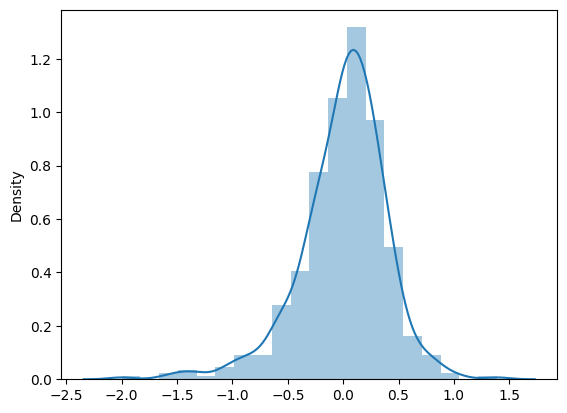

In [57]:
sns.distplot(residuals,bins=20)

We can see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### 2) Linear relationship between X and Y (we have already seen this in EDA in bi-variate analysis)

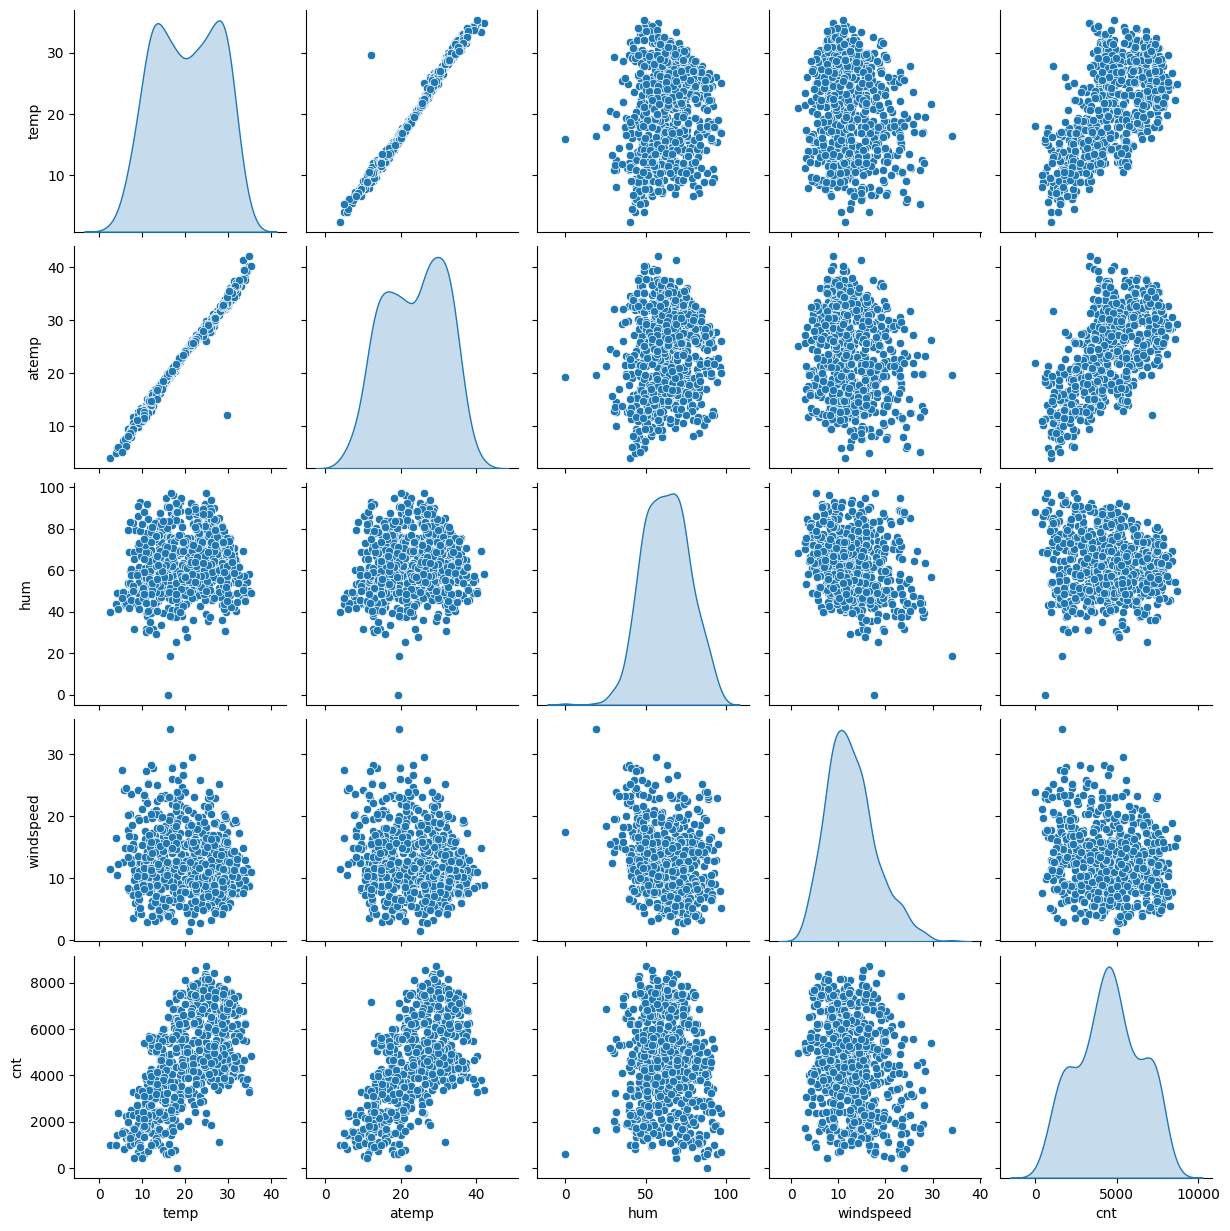

In [58]:
df_new=df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_new, diag_kind='kde')
plt.show()

#### Target has a linear realtionship with temp and atemp

### 3) There is no multicolinearity between the predictors

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.77
5,season_spring,4.14
2,temp,3.51
6,season_winter,3.47
3,hum,1.99
9,mnth_4,1.68
1,workingday,1.65
15,weekday_6,1.64
17,weathersit_Misty,1.60
13,mnth_10,1.54


#### We can see that all the variables have VIF <=5.

# Prediction using the obtained model and the columns chosen

In [60]:
X_train_sm.columns

Index(['const', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_9', 'mnth_10', 'weekday_1', 'weekday_6',
       'weathersit_Light Snow/Rain', 'weathersit_Misty'],
      dtype='object')

In [61]:
cols = ['workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'yr_2019', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_9', 'mnth_10', 'weekday_1', 'weekday_6',
       'weathersit_Light Snow/Rain', 'weathersit_Misty']
X_test_sm = X_test[cols]

In [62]:
X_test_sm = sm.add_constant(X_test_sm)

In [63]:
y_pred_test = lr13.predict(X_test_sm)

In [64]:
y_pred_train = lr13.predict(X_train_sm)

### R2 value for test and train

In [65]:
print("The test r2 score is :",r2_score(y_test,y_pred_test))
print("The train r2 score is :",r2_score(y_train,y_pred_train))

The test r2 score is : 0.8384143147174133
The train r2 score is : 0.844490038266516


#### We can see that they are close by , hence the model is able to predict well on unseen data as well. There is no bias on the training set

#### Let's also visualise how the y_pred and y_test are spread out

Text(0, 0.5, 'y_pred')

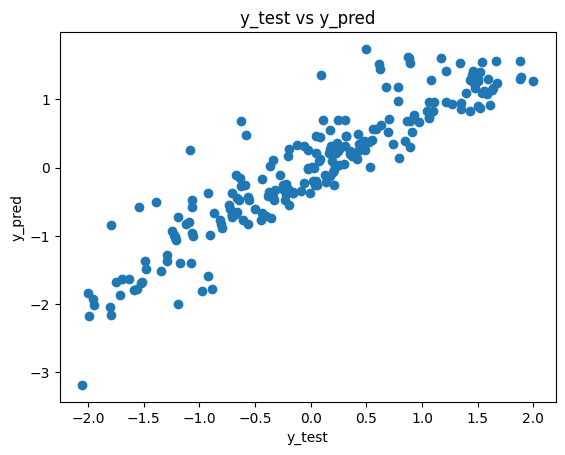

In [69]:
plt.scatter(y_test,y_pred_test)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

#### Insights
We can see that there is a linear realtionship between the predicted values and actual values

# Model using RFE (Automatic Feature Selection)

In [70]:
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [71]:
important_features = pd.DataFrame()
important_features['cols']=X_train.columns
important_features['rank']=rfe.ranking_
important_features[important_features['rank']==1]

,cols,rank
1,workingday,1
2,temp,1
6,season_spring,1
9,yr_2019,1
11,mnth_3,1
17,mnth_9,1
18,mnth_10,1
26,weekday_6,1
27,weathersit_Light Snow/Rain,1
28,weathersit_Misty,1


In [72]:
final_cols = rfe.get_feature_names_out()

In [73]:
final_cols = ['workingday', 'temp', 'season_spring', 'yr_2019', 'mnth_3',
       'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_Light Snow/Rain',
       'weathersit_Misty']

In [74]:
X_train_rfe = X_train.copy()
X_train_rfe = X_train_rfe[final_cols]
X_train_rfe = sm.add_constant(X_train_rfe)

In [75]:
rfe_lr_model = sm.OLS(y_train,X_train_rfe).fit()
rfe_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.30e-178
Time:                        14:11:42   Log-Likelihood:                -287.07
No. Observations:                 510   AIC:                             596.1
Df Residuals:                     499   BIC:                             642.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.4512      0.055     -8.218      0.000      -0.559      -0.343
workingday                     0.1926      0.052      3.693      0.000       0.090       0.295
temp                           0.3894      0.025     15.638      0.000       0.340       0.438
season_spring                 -0.6850      0.059    -11.533      0.000      -0.802      -0.568
yr_2019                        1.0430      0.038     27.304      0.000       0.968       1.118
mnth_3                         0.2518      0.074      3.388      0.001       0.106       0.398
mnth_9                         0.3970      0.071      5.555      0.000       0.257       0.537
mnth_10                        0.3807      0.071      5.327      0.000       0.240       0.521
weekday_6                      0.2291      0.068      3.384      0.001       0.096       0.362
weathersit_Light Snow/Rain    -1.5355      0.123    -12.462      0.000      -1.778      -1.293
weathersit_Misty              -0.3318      0.041     -8.118      0.000      -0.412      -0.252
==============================================================================
Omnibus:                       93.721   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.924
Skew:                          -0.905   Prob(JB):                     5.37e-55
Kurtosis:                       5.913   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
X_test_rfe = X_test[final_cols]
X_test_rfe = sm.add_constant(X_test_rfe)

In [77]:
y_pred_test_rfe = rfe_lr_model.predict(X_test_rfe)

In [78]:
y_pred_train_rfe = rfe_lr_model.predict(X_train_rfe)

#### Test Score of RFE model

In [79]:
print("The test r2 score is :",r2_score(y_test,y_pred_test_rfe))
print("The train r2 score is :",r2_score(y_train,y_pred_train_rfe))

The test r2 score is : 0.8251776578531052
The train r2 score is : 0.8195183814263574


# Final Model Stats

In [92]:
def adj_r(x,n,p):
    return 1-(1-x)*(n-1)/(n-p-1)

In [98]:
model_stats = pd.DataFrame()
model_stats['Name'] = ['Manual Selection','RFE Selection']
model_stats['Train R2 Score'] = [0.844490038266516,0.8195183814263574]
model_stats['Test R2 Score'] = [0.8384143147174133,0.8251776578531052]
model_stats['Train Adjusted R2 score'] = [0.8391166869918699,0.815901126252505]
model_stats['Test Adjusted R2 score']=[0.8247475223880597,0.8167730961538462]

In [96]:
### 1st model (Manual Selection) train and test Adjusted r value
adj_r(x=0.844490,n=510,p=17),adj_r(x=0.838414,n=219,p=17)

(0.8391166869918699, 0.8247475223880597)

In [97]:
### 2nd model (Automated RFE selection) Train and test adjusted R2 value
adj_r(x=0.819518,n=510,p=10),adj_r(x=0.825178,n=219,p=10)

(0.815901126252505, 0.8167730961538462)

In [99]:
model_stats

,Name,Train R2 Score,Test R2 Score,Train Adjusted R2 score,Test Adjusted R2 score
0,Manual Selection,0.844490,0.838414,0.839117,0.824748
1,RFE Selection,0.819518,0.825178,0.815901,0.816773


#### We can see that both the models don't have any severe bias towards the Training data

# Model Interpretation based on the Manual Selection

#### y = -0.6567x'const'+ 0.1916x'workingday'+ 0.4649x'temp'+ -0.1171x'hum'+ -0.1318 'windspeed' + -0.4285x'season_spring' +
####       0.2882x'season_winter' + 1.0239x'yr_2019' + 0.2893x'mnth_3'+ 0.1745x'mnth_4'+0.2867 x'mnth_5'+ 0.1610x'mnth_6'+
####      0.4526x'mnth_9' + 0.2704x'mnth_10' + -0.1209x'weekday_1' + 0.2293x 'weekday_6'+
####       -1.2188x'weathersit_Light Snow/Rain'-0.2143 x 'weathersit_Misty']

#### The above is the equation of the best fit line based on the co-efficients that are significant and the columns that are chosen

# Conclusion

1) Both the manual and automatic are good in their own way.
2) With 7 lesser columns , RFE is giving nearly the same results. The drawback being we don't get to choose business relevant columns.
3) Manual selection gives a slightly higher R2 score and we have the freedom to choose business relevant columns.